In [111]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [112]:
# Load data
df = pd.read_pickle('timeData.pkl')

In [113]:
# Process data
## Fill missing values with cutoff time
CUTOFF = 180
timeCols = ['brute_time', 'astar_time', 'greedy_time']
df[timeCols] = df[timeCols].fillna(value=CUTOFF)

## Split data into runs
singleRun = df[:22]
repeatRun = df[22:].reset_index()

<IPython.core.display.Javascript object>


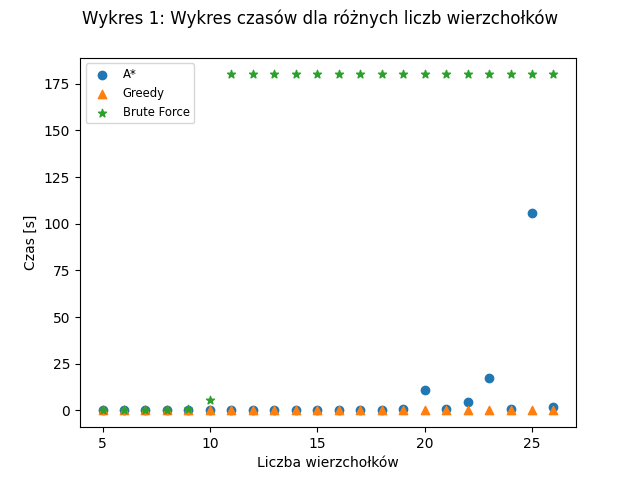

In [114]:
# Viusalize single run
fig = plt.figure()
fig.suptitle('Wykres 1: Wykres czasów dla różnych liczb wierzchołków')
plt.scatter(singleRun['nodes_number'], singleRun['astar_time'], label='A*')
plt.scatter(singleRun['nodes_number'], singleRun['greedy_time'], label='Greedy', marker='^')
plt.scatter(singleRun['nodes_number'], singleRun['brute_time'], label='Brute Force', marker='*')
fig.axes[0].set_xlabel('Liczba wierzchołków')
fig.axes[0].set_ylabel('Czas [s]')
plt.legend(fontsize='small')
fig.savefig('plots/test1.png')
plt.show()

<IPython.core.display.Javascript object>


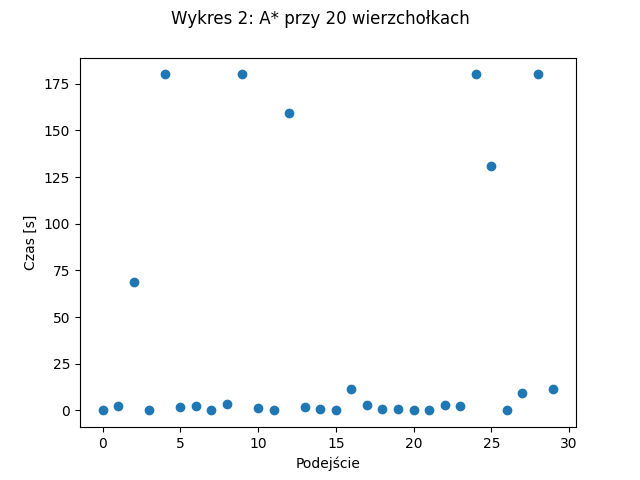

In [115]:
# Visualize repeat run

filterNumRows = repeatRun['nodes_number'] == 20
data = repeatRun[filterNumRows].reset_index()
fig = plt.figure()
fig.suptitle('Wykres 2: A* przy 20 wierzchołkach')
plt.scatter(data.index, data['astar_time'])
fig.axes[0].set_ylabel('Czas [s]')
fig.axes[0].set_xlabel('Podejście')
fig.savefig('plots/test2astar.png')
plt.show()

/home/sz4l3k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


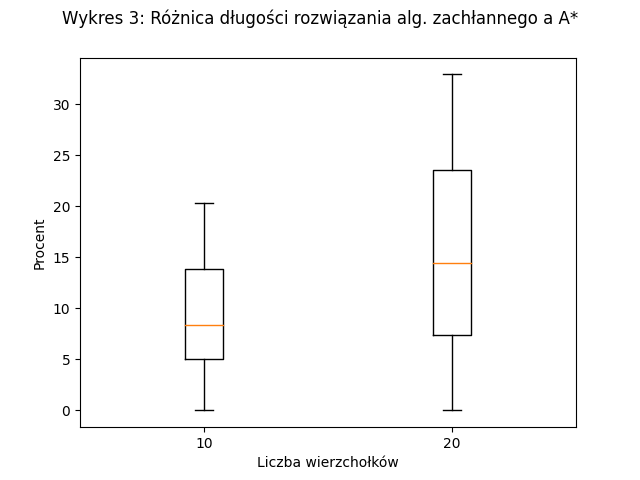

11.914640376404988

In [116]:
# Length comparison
## Filter
boxData = repeatRun.dropna(subset=['astar_length'])
boxData['percentage'] = (boxData['greedy_length'] - boxData['astar_length'])/boxData['astar_length']*100
filter10Rows = boxData['nodes_number'] == 10
filter20Rows = boxData['nodes_number'] == 20
fig = plt.figure()
fig.suptitle('Wykres 3: Różnica długości rozwiązania alg. zachłannego a A*')
plt.boxplot([boxData[filter10Rows]['percentage'], boxData[filter20Rows]['percentage']], labels=['10', '20'])
fig.axes[0].set_ylabel('Procent')
fig.axes[0].set_xlabel('Liczba wierzchołków')
fig.savefig('plots/test2comparison.png')
plt.show()
boxData['percentage'].mean()